# MNIST Classification

In [14]:
import datetime
import tensorflow as tf
import cv2
import random
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from keras.models import Model
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Conv2D, Input, Flatten, MaxPool2D, Dropout
from keras.datasets import mnist

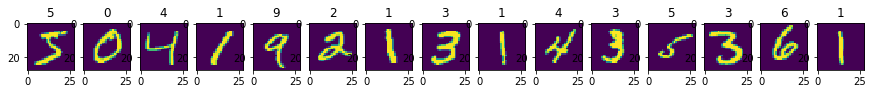

Train: (60000, 28, 28) (60000, 1)
Test: (10000, 28, 28) (10000, 1)


In [15]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
plt.figure(figsize=(15, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
plt.show()
y_train = np.expand_dims(y_train, -1)
y_test = np.expand_dims(y_test, -1)
print('Train:', x_train.shape, y_train.shape)
print('Test:', x_test.shape, y_test.shape)

In [16]:
def create_model(inp):
    layer = Conv2D(filters=8, kernel_size=(3, 3), padding='same')(inp)
    layer = MaxPool2D(pool_size=(2, 2))(layer)
    layer = Conv2D(filters=16, kernel_size=(3, 3), padding='same')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=128)(layer)
    layer = Dropout(0.2)(layer)
    out = Dense(units=10, activation='softmax')(layer)
    return out

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

y_train_cl = to_categorical(y_train, num_classes=10)
y_test_cl = to_categorical(y_test, num_classes=10)
print(y_train_cl.shape)

inp = Input(shape=(28, 28, 1))

out = create_model(inp)
model = Model(inp, out)
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
log_dir = "logs/mnist_tb/" + 'adam'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train_cl, 
          batch_size=28,
          epochs=10,
          validation_data=(x_test, y_test_cl), 
          callbacks=[tensorboard_callback])

(60000, 10)
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)  

In [30]:
model2 = Model(inp, out)
model2.summary()
model2.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/mnist_tb/" + 'RMSProp'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model2.fit(x=x_train, 
          y=y_train_cl, 
          batch_size=28,
          epochs=10,
          validation_data=(x_test, y_test_cl), 
          callbacks=[tensorboard_callback])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [31]:
model3 = Model(inp, out)
model3.summary()
model3.compile(optimizer='Adagrad',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

log_dir = "logs/mnist_tb/" + 'Adagrad'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model3.fit(x=x_train, 
          y=y_train_cl, 
          batch_size=28,
          epochs=10,
          validation_data=(x_test, y_test_cl), 
           callbacks=[tensorboard_callback])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [32]:
model4 = Model(inp, out)
model4.summary()
model4.compile(optimizer='Adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/mnist_tb/" + 'Adamax'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model4.fit(x=x_train, 
          y=y_train_cl, 
          batch_size = 28,
          epochs=10, 
          validation_data=(x_test, y_test_cl), 
          callbacks=[tensorboard_callback])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

The graph of accuracy for validation set for different optimizers shows that number of epochs is sufficient: the fucntion reaches its asymptote. The accuracy values for different optimizers are close to each other, but "AdamMax" (4) and  "Adamgrad" (3) show better performance than Adam (1)

Plotting image of accuracy for validation set

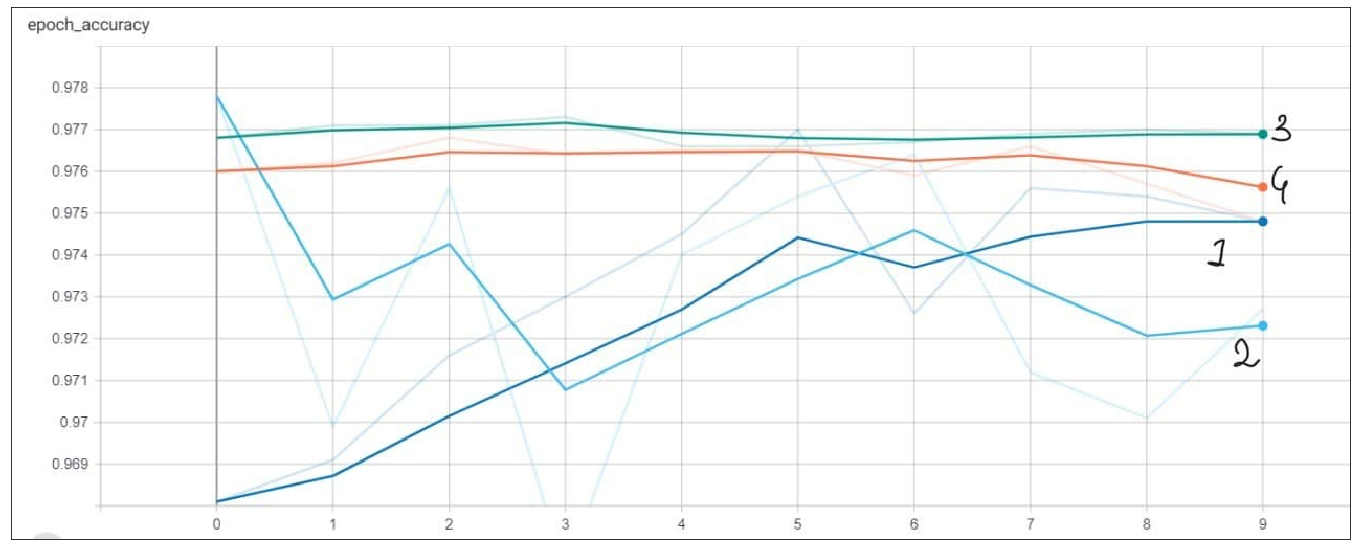

In [33]:
image = 'accuracy_models.jpg'
accuracy_models = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB) 
plt.figure(figsize= (24,12))
plt.xticks([]), plt.yticks([]) 
plt.imshow(accuracy_models)

The loss for validation function is the lowest for Adam optimizer. So, as the accuracy does not differ much for all the optimizers, we can say that Adam optimizer is preferable

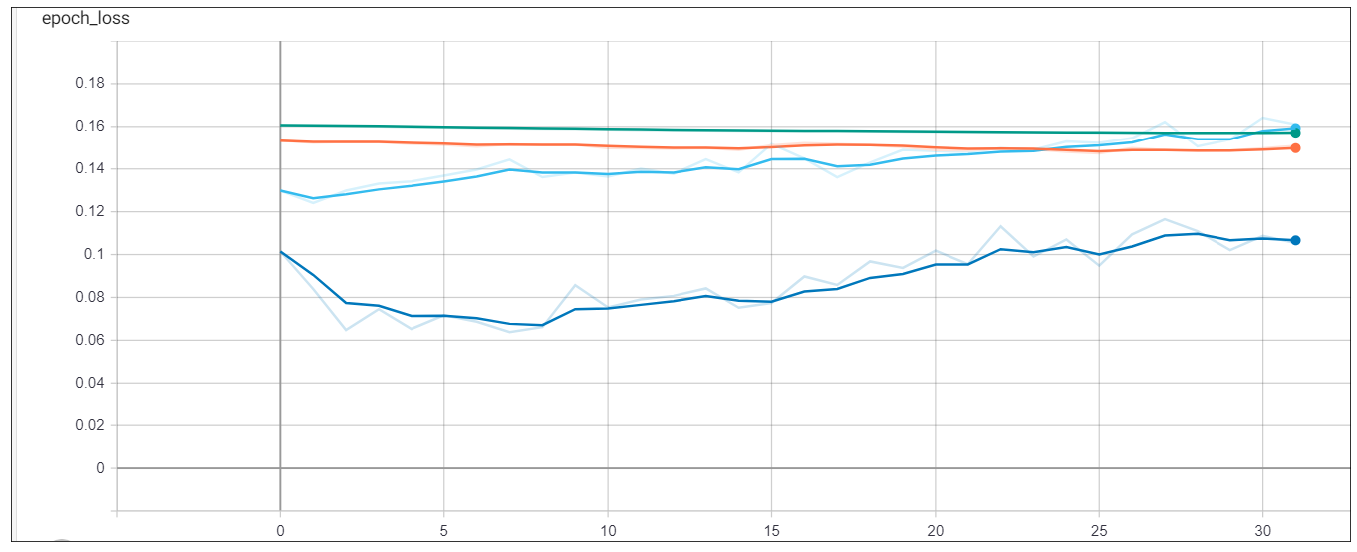

In [34]:
image = 'tb_loss_acc.png'
accuracy_models = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB) 
plt.figure(figsize= (24,12))
plt.xticks([]), plt.yticks([]) 
plt.imshow(accuracy_models)

In [35]:
def create_model_overfitting(inp):
    layer = Conv2D(filters=24, kernel_size=(3, 3), padding='same')(inp)
    layer = MaxPool2D(pool_size=(2, 2))(layer)

    layer = Flatten()(layer)
    layer = Dense(units=64)(layer)
    out = Dense(units=10, activation='softmax')(layer)
    return out

In [38]:
out_overfitting = create_model_overfitting(inp)
model_overfitting = Model(inp, out_overfitting)
model_overfitting.summary()
model_overfitting.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/mnist_overr/" + 'adam'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train_cl, 
          epochs=15, 
          batch_size= 5,
          validation_data=(x_test, y_test_cl), 
          callbacks=[tensorboard_callback])

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                301120    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 302,010
Trainable params: 302,010
Non-trainable params: 0
_______________________________________________

Overfitting: The plot of training loss continues to decrease.
The plot of validation loss decreases to a point and then begins increasing again.
The inflection point in validation loss may be the point at which training could be halted as experience after that point shows the dynamics of overfitting.

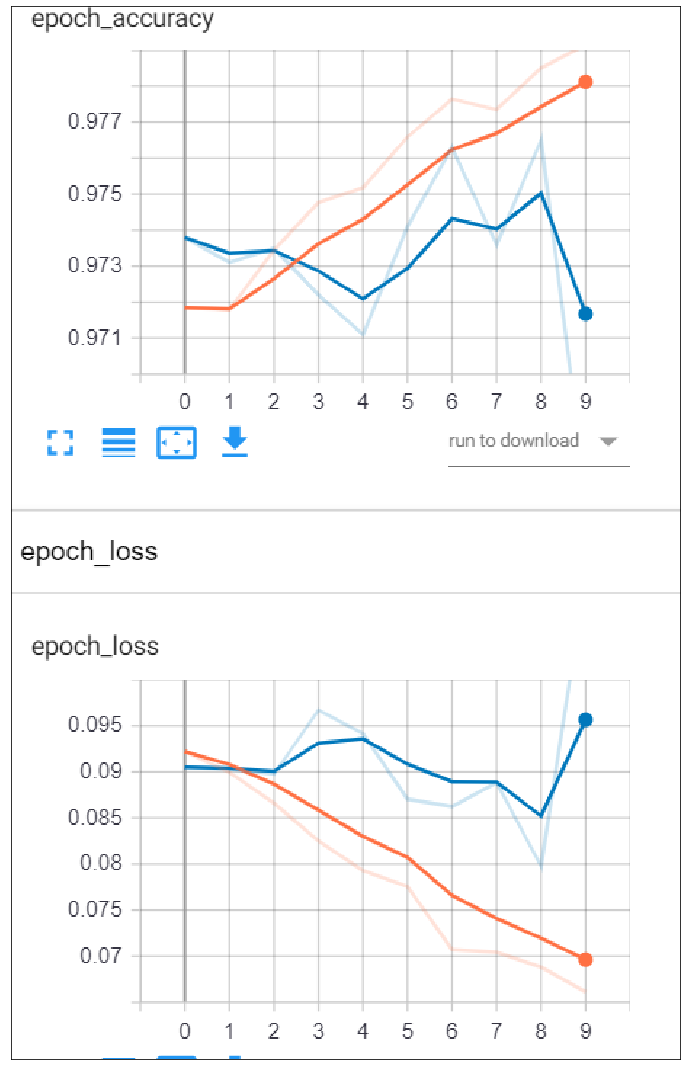

In [39]:
image = 'overfit.png'
accuracy_models = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB) 
plt.figure(figsize= (12,24))
plt.xticks([]), plt.yticks([]) 
plt.imshow(accuracy_models)

In [18]:
def rotation(image,angle):
    #image = ndimage.rotate(image, angle) 
    image = image.reshape((28,28))
    return image
    

def blur(image):
    kernel = (random.randint(1,10), random.randint(1,10))
    #image = cv2.blur(image, kernel)
    image = image.reshape((28,28))
    return image

def flip(image):
    flip = random.randint(-1,1)
    #image = cv2.flip(image, flip)
    image = image.reshape((28,28))
    return image
    
def augmentations(image, type):
    cases = {
        '1': lambda image: rotation(image, random.randrange(0,360)),
        '2': lambda image: blur(image),
        '3': lambda image: flip(image)
    }
    result = cases[str(type)]
    return result(image)


In [19]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(type(x_train))
x_train_augmented = x_train
print(np.shape(x_train[0]))
for i, image in enumerate(x_train):
    x_train_augmented[i] = augmentations(image, random.randint(1,3))
    #i = i + 1
# np.append(x_train_augmented,x_train)   
# np.append(y_train,y_train)
x_train_augmented = np.concatenate((x_train, x_train_augmented), axis=0)
#x_test_augmented = np.concatenate((x_test, x_test_augmented), axis=0)
print(np.shape(x_train_augmented))
print(np.shape(x_train))
y_train = np.concatenate((y_train,y_train),axis=0)


<class 'numpy.ndarray'>
(28, 28)
(120000, 28, 28)
(60000, 28, 28)


In [20]:
x_train_augmented, x_test_augmented = x_train_augmented / 255.0, x_test_augmented / 255.0
y_train_cl = to_categorical(y_train, num_classes=10)
y_test_cl = to_categorical(y_test, num_classes=10)
out5 = create_model(inp)
model5 = Model(inp, out5)
model5.summary()
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/mnist/" + 'augmentation'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model5.fit(x=x_train_augmented, 
          y=y_train_cl, 
          epochs=15, 
          batch_size = 28,
          validation_data=(x_test_augmented, y_test_cl), 
          callbacks=[tensorboard_callback])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [21]:
image = 'augmentation.png'
accuracy_models = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB) 
plt.figure(figsize= (12,24))
plt.xticks([]), plt.yticks([]) 
plt.imshow(accuracy_models)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
